## Convolutional Neural Network (3 convolutional layers)

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

C:\Users\Veda\anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Veda\anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Veda\anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Veda\anaconda3\envs\deeplearning\lib\site-pack

In [ ]:
# Creating a Convolutional Neural Network (CNN)


classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a third convolutional layer
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Fully connected Layers
classifier.add(Dense(output_dim = 128, activation = 'relu'))
classifier.add(Dense(output_dim = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [3]:
from keras.preprocessing.image import ImageDataGenerator

# Rescaling the images

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rotation_range=15,
                                   vertical_flip=True,
                                   fill_mode='reflect',
                                   data_format='channels_last',
                                   brightness_range=[0.5, 1.5],
                                   featurewise_center=True,
                                   featurewise_std_normalization=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

# training images folder address should be given to the below function

training_set = train_datagen.flow_from_directory("C:/Users/Veda/Desktop/Database/train",
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')


# testing images folder address should be given to the below function

test_set = test_datagen.flow_from_directory("C:/Users/Veda/Desktop/Database/test",
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 348 images belonging to 2 classes.
Found 348 images belonging to 2 classes.


In [4]:
history = classifier.fit_generator(training_set,
                         samples_per_epoch =288 ,       # number of training samples per epoch
                         nb_epoch = 100,                # number of epochs
                         validation_data = test_set,
                         nb_val_samples = 160)          # number of testing samples per epoch

C:\Users\Veda\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
C:\Users\Veda\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., steps_per_epoch=9, epochs=100, validation_steps=160)`
  """


C:\Users\Veda\anaconda3\envs\deeplearning\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\Veda\anaconda3\envs\deeplearning\lib\site-packages\keras_preprocessing\image\image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/100
9/9 [==============================] - 58s 6s/step - loss: 0.6798 - accuracy: 0.5986 - val_loss: 0.6530 - val_accuracy: 0.5808
Epoch 2/100
9/9 [==============================] - 57s 6s/step - loss: 0.6758 - accuracy: 0.5799 - val_loss: 0.6686 - val_accuracy: 0.5796
Epoch 3/100
9/9 [==============================] - 56s 6s/step - loss: 0.6805 - accuracy: 0.5528 - val_loss: 0.6532 - val_accuracy: 0.6175
Epoch 4/100
9/9 [==============================] - 56s 6s/step - loss: 0.6611 - accuracy: 0.5986 - val_loss: 0.6887 - val_accuracy: 0.5617
Epoch 5/100
9/9 [==============================] - 55s 6s/step - loss: 0.6669 - accuracy: 0.5775 - val_loss: 0.6587 - val_accuracy: 0.5944
Epoch 6/100
9/9 [==============================] - 55s 6s/step - loss: 0.6553 - accuracy: 0.5915 - val_loss: 0.6049 - val_accuracy: 0.6211
Epoch 7/100
9/9 [==============================] - 56s 6s/step - loss: 0.6702 - accuracy: 0.6111 - val_loss: 0.6859 - val_accuracy: 0.5904
Epoch 8/100
9/9 [==========

Text(0.5, 0, 'Epoch')

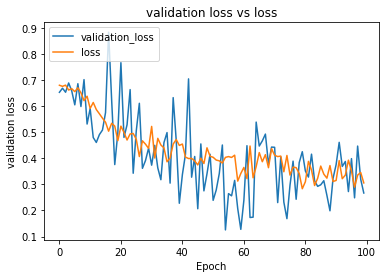

In [5]:
# ploting loss and Validation Loss
fig = plt.figure()
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.legend(['validation_loss','loss'], loc='upper left')
plt.title('validation loss vs loss')
plt.ylabel('validation loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

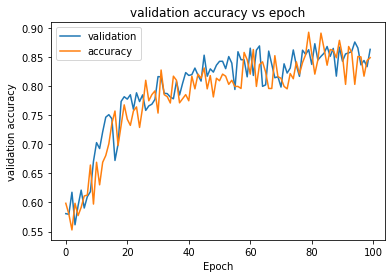

In [6]:
# Ploting accuracy and validation accuracy
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.legend(['validation','accuracy'], loc='upper left')
plt.title('validation accuracy vs epoch')
plt.ylabel('validation accuracy')
plt.xlabel('Epoch')